In [1]:
from video import *
import numpy as np
from utils import *

In [2]:
video_a = load_video("train/task1/06_query.mp4")
video_b = load_video("train/task1/06_reference.mp4")

In [3]:
a = video_a.get_frame(100).raw()
b = video_b.get_frame(600).raw()

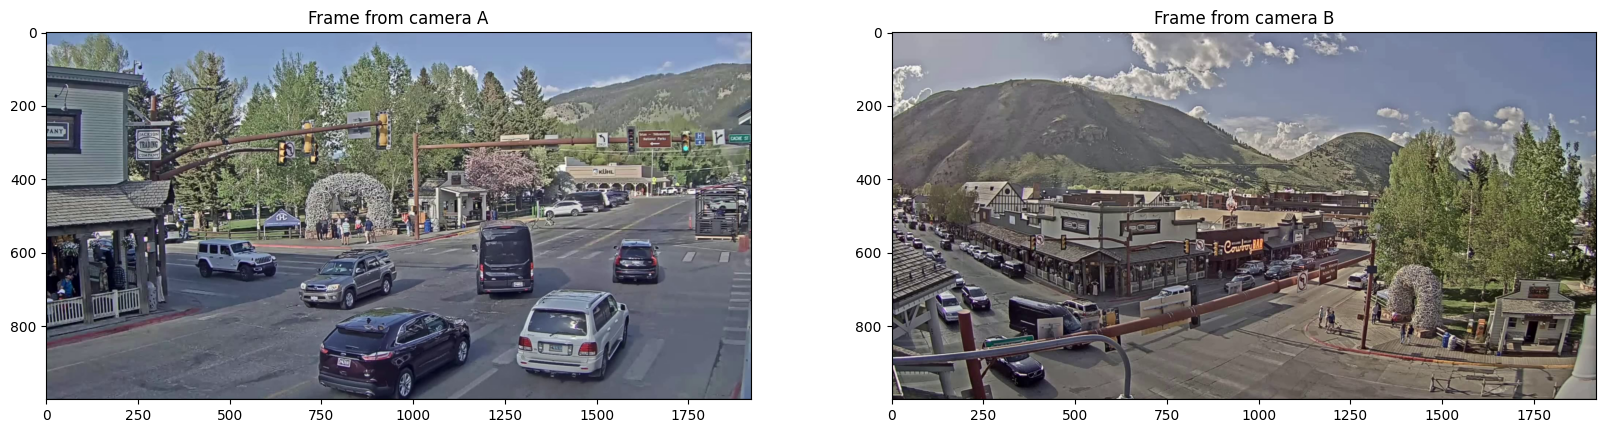

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].set_title("Frame from camera A")
axs[0].imshow(a)
axs[1].set_title("Frame from camera B")
axs[1].imshow(b)
plt.show()

In [5]:
cv.imwrite("correspondences/camera_a.png", cv.cvtColor(a, cv.COLOR_RGB2BGR))
cv.imwrite("correspondences/camera_b.png", cv.cvtColor(b, cv.COLOR_RGB2BGR))

True

In [6]:
coordinates_a = np.array(
    [
       [769, 595],
       [1013, 577],
       [196, 781],
       [958, 551],
       [1298, 779],
       [821, 579],
       [1345, 719],
       [1645, 780],
       [812, 621],
       [332, 716],
       [1318, 539],
       [1667, 675],
       [1219, 795],
       [517, 722],
       [873, 577],
       [1578, 856],
       [1138, 903],
       [993, 987],
       [1683, 838],
    ]
)

coordinates_b = np.array(
    [
        [1087, 796],
        [1272, 877],
        [484, 710],
        [1438, 832],
        [270, 795],
        [1164, 804],
        [332, 826],
        [159, 821],
        [897, 807],
        [613, 721],
        [1601, 991],
        [263, 911],
        [279, 790],
        [595, 748],
        [1185, 820],
        [141, 789],
        [214, 754],
        [197, 737],
        [146, 813],
    ]
)

F, mask = cv.findHomography(coordinates_a, coordinates_b, 0)
Finv, mask = cv.findHomography(coordinates_b, coordinates_a, 0)
print(F)
print(mask)

[[     0.4333     0.88173     -1550.3]
 [    0.14029     -2.1933      681.49]
 [ 0.00029121   -0.003145           1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


Text(0.5, 1.0, 'Camera B')

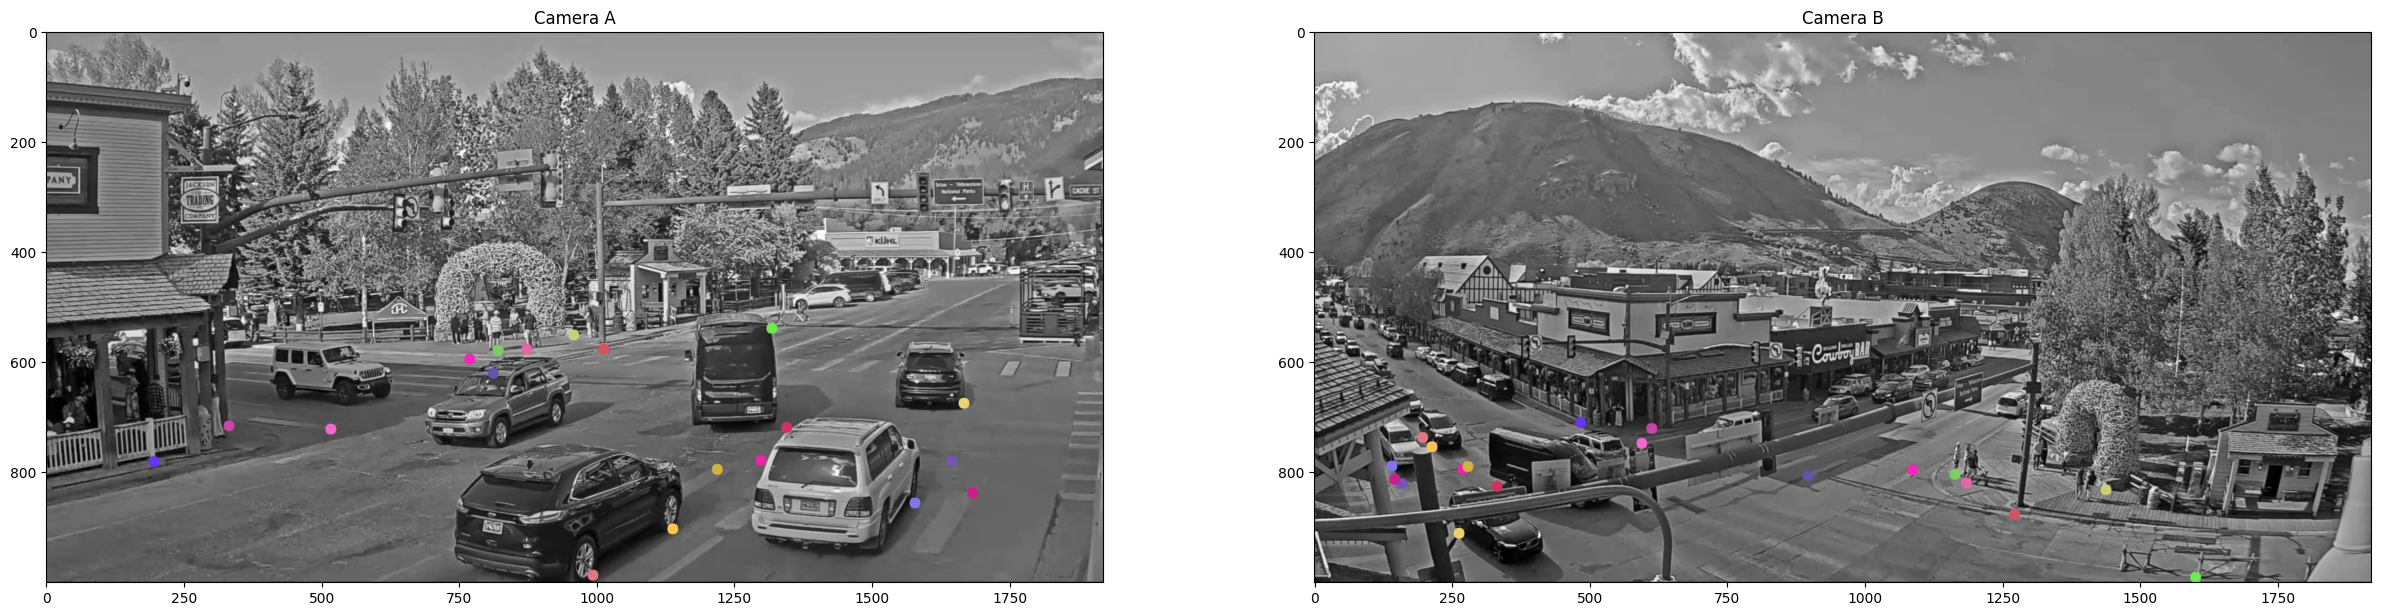

In [7]:
a_points = cv.cvtColor(cv.cvtColor(np.copy(a), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)
b_points = cv.cvtColor(cv.cvtColor(np.copy(b), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)

colors = [np.random.randint([100, 30, 50], [255, 255, 255]).tolist() for _ in range(len(coordinates_a))]
for i in range(len(coordinates_a)):
    cv.circle(a_points, tuple(coordinates_a[i]), 10, colors[i], -1)
    cv.circle(b_points, tuple(coordinates_b[i]), 10, colors[i], -1)

fig, ax = plt.subplots(1, 2, figsize=(30, 40))
ax[0].imshow(a_points)
ax[0].set_title("Camera A")
ax[1].imshow(b_points)
ax[1].set_title("Camera B")

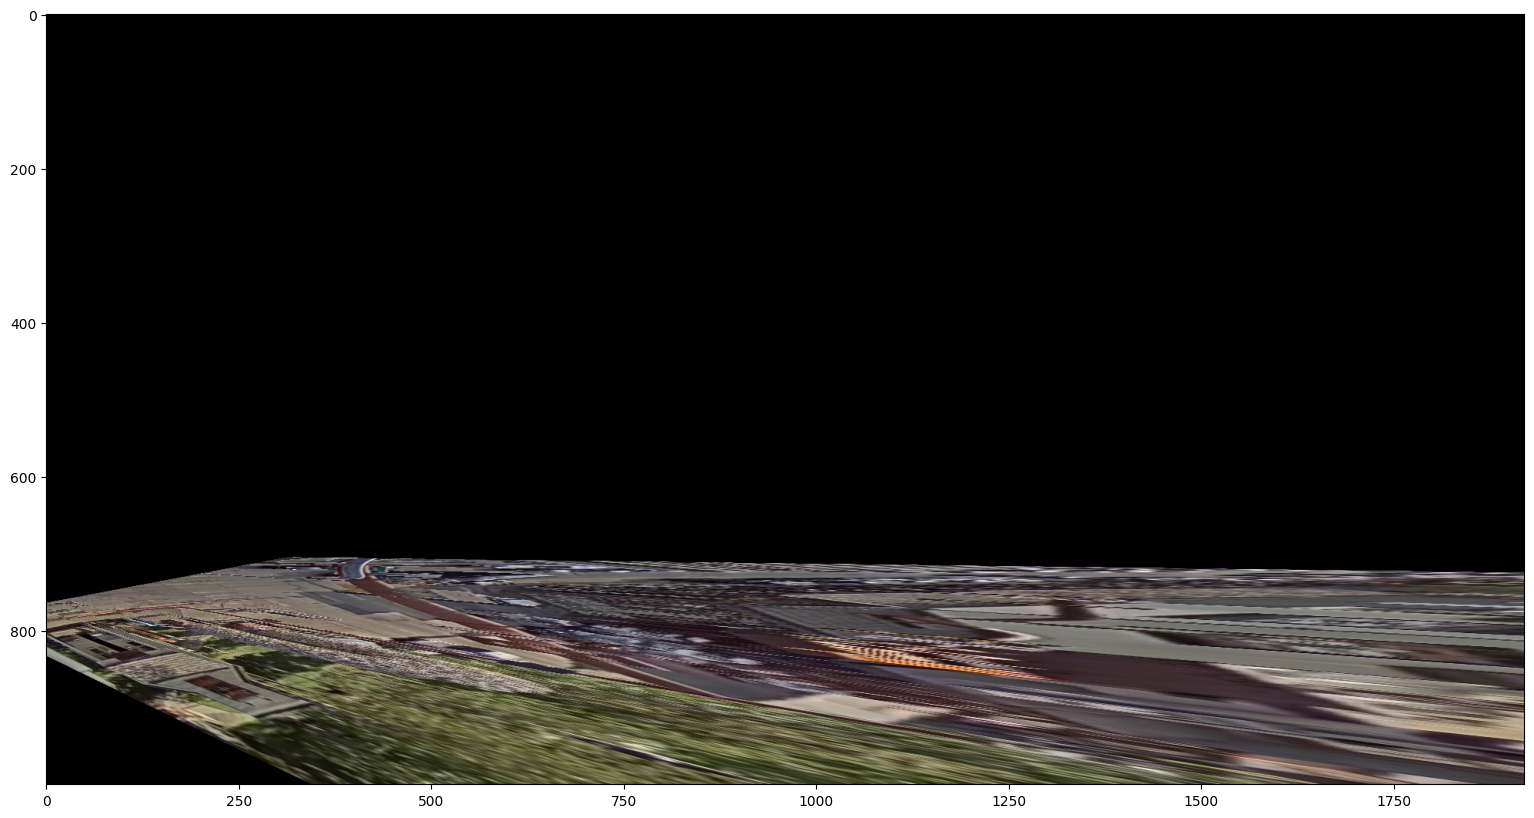

In [8]:
warped = cv.warpPerspective(b, F, (b.shape[1], b.shape[0]))

plt.figure(figsize=(20, 10))
plt.imshow(warped)

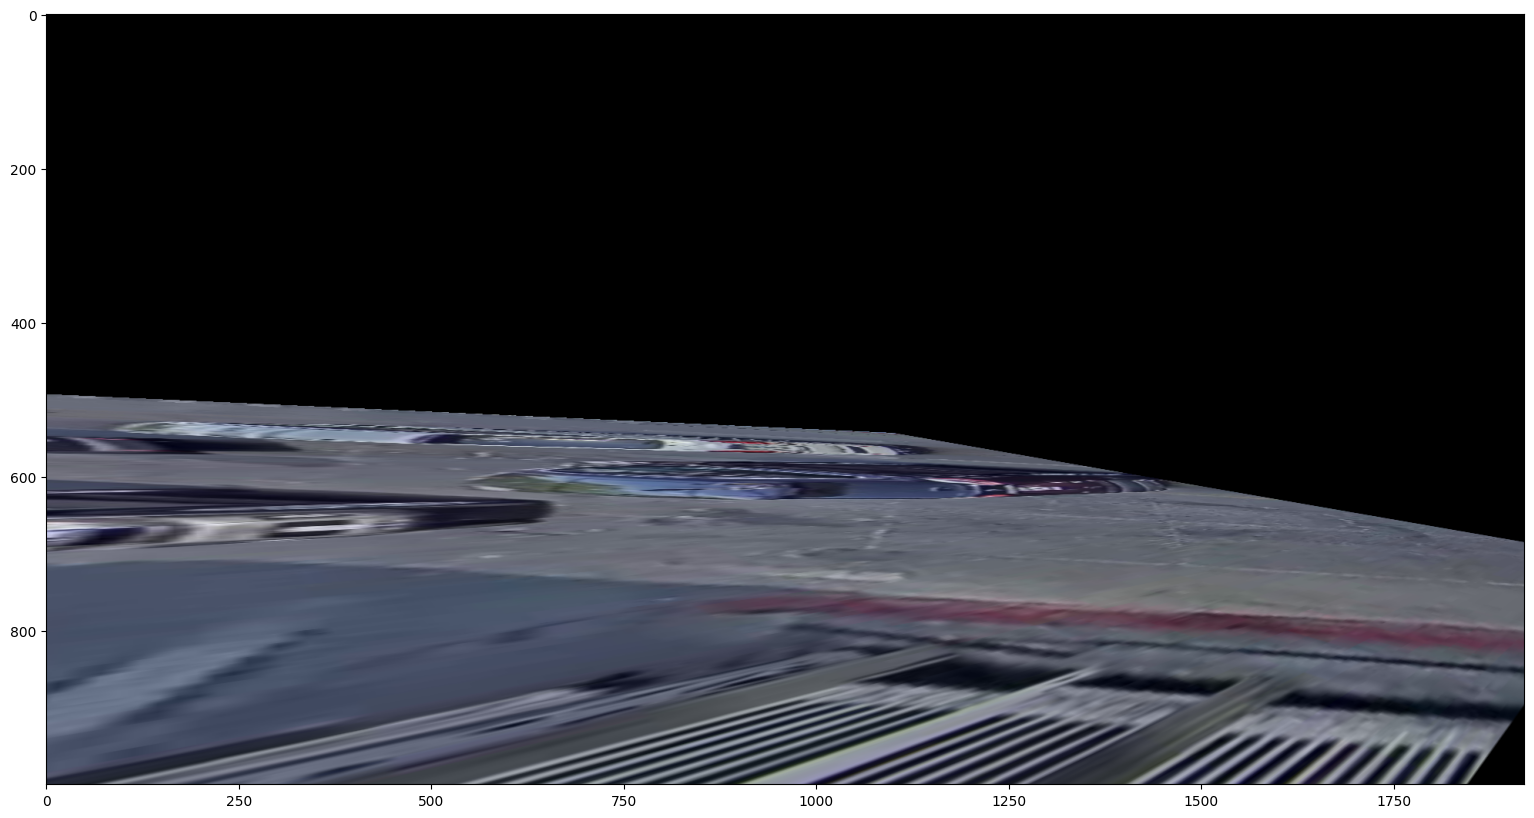

In [9]:
warped = cv.warpPerspective(a, Finv, (a.shape[1], a.shape[0]))

plt.figure(figsize=(20, 10))
plt.imshow(warped)

[[169 732]]


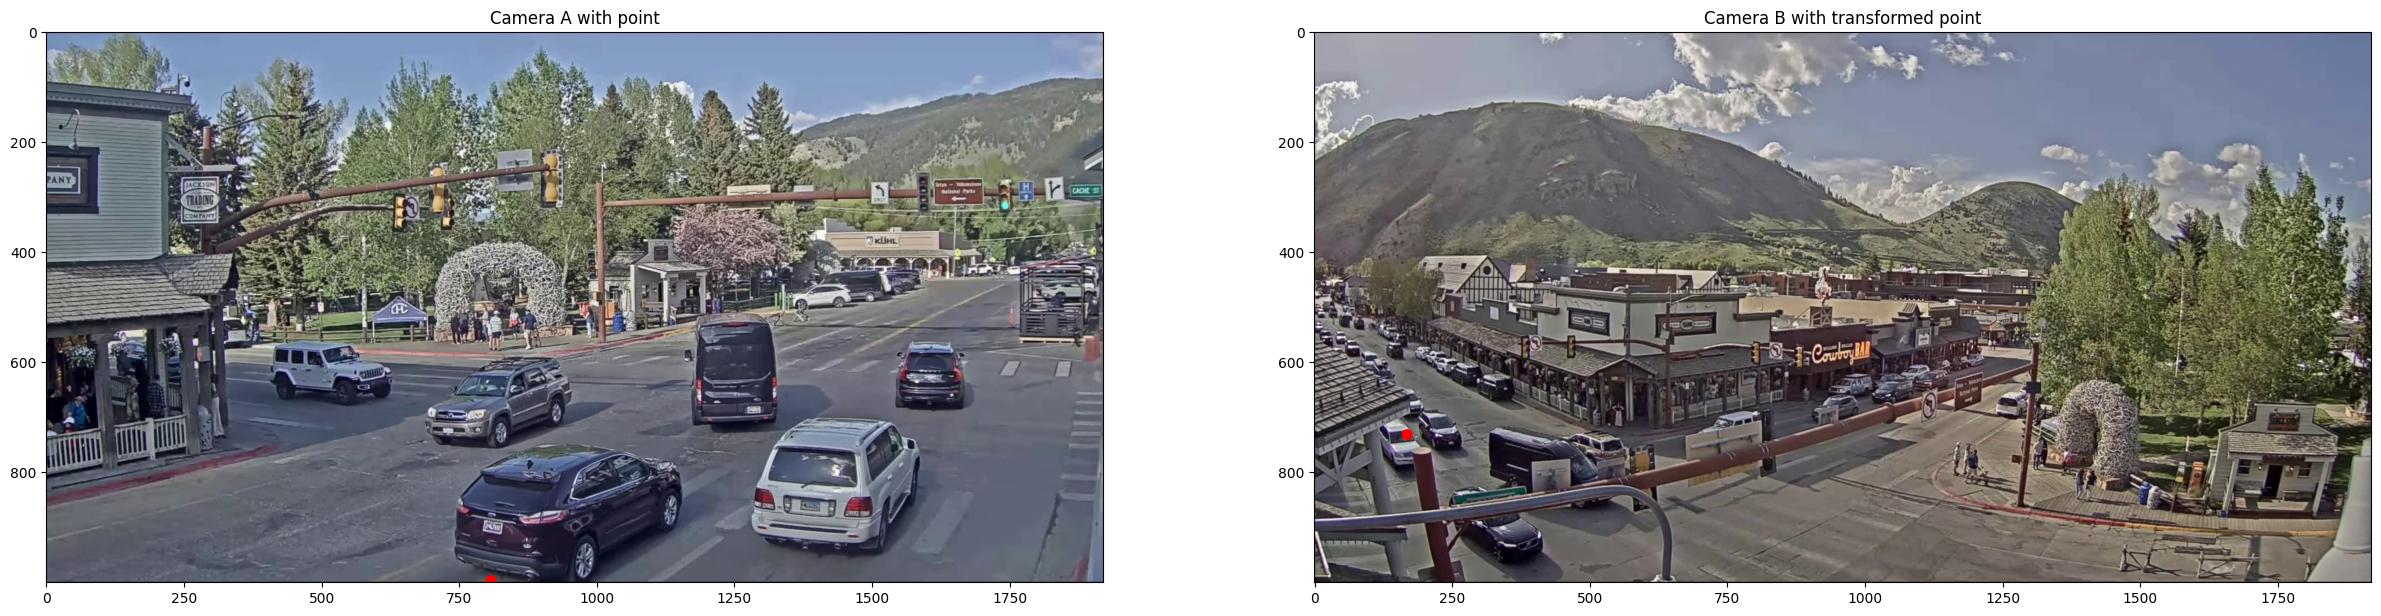

In [10]:
# Transform the points from camera A to camera B

points_to_transform = np.array([
    [808, 997],
])
transformed_points = cv.perspectiveTransform(points_to_transform.reshape(-1, 1, 2).astype(np.float32), F)[0].astype(int)
print(transformed_points)

a_copy = a.copy()
b_copy = b.copy()

cv.circle(a_copy, points_to_transform[0], 10, (255, 0, 0), -1)

# Draw the transformed points on the warped image
for i in range(len(transformed_points)):
    cv.circle(b_copy, transformed_points[i], 10, (255, 0, 0), -1)

fig, ax = plt.subplots(1, 2, figsize=(30, 40))
ax[0].imshow(a_copy)
ax[0].set_title("Camera A with point")
ax[1].imshow(b_copy)
ax[1].set_title("Camera B with transformed point")
plt.show()

[[ 64 753]]


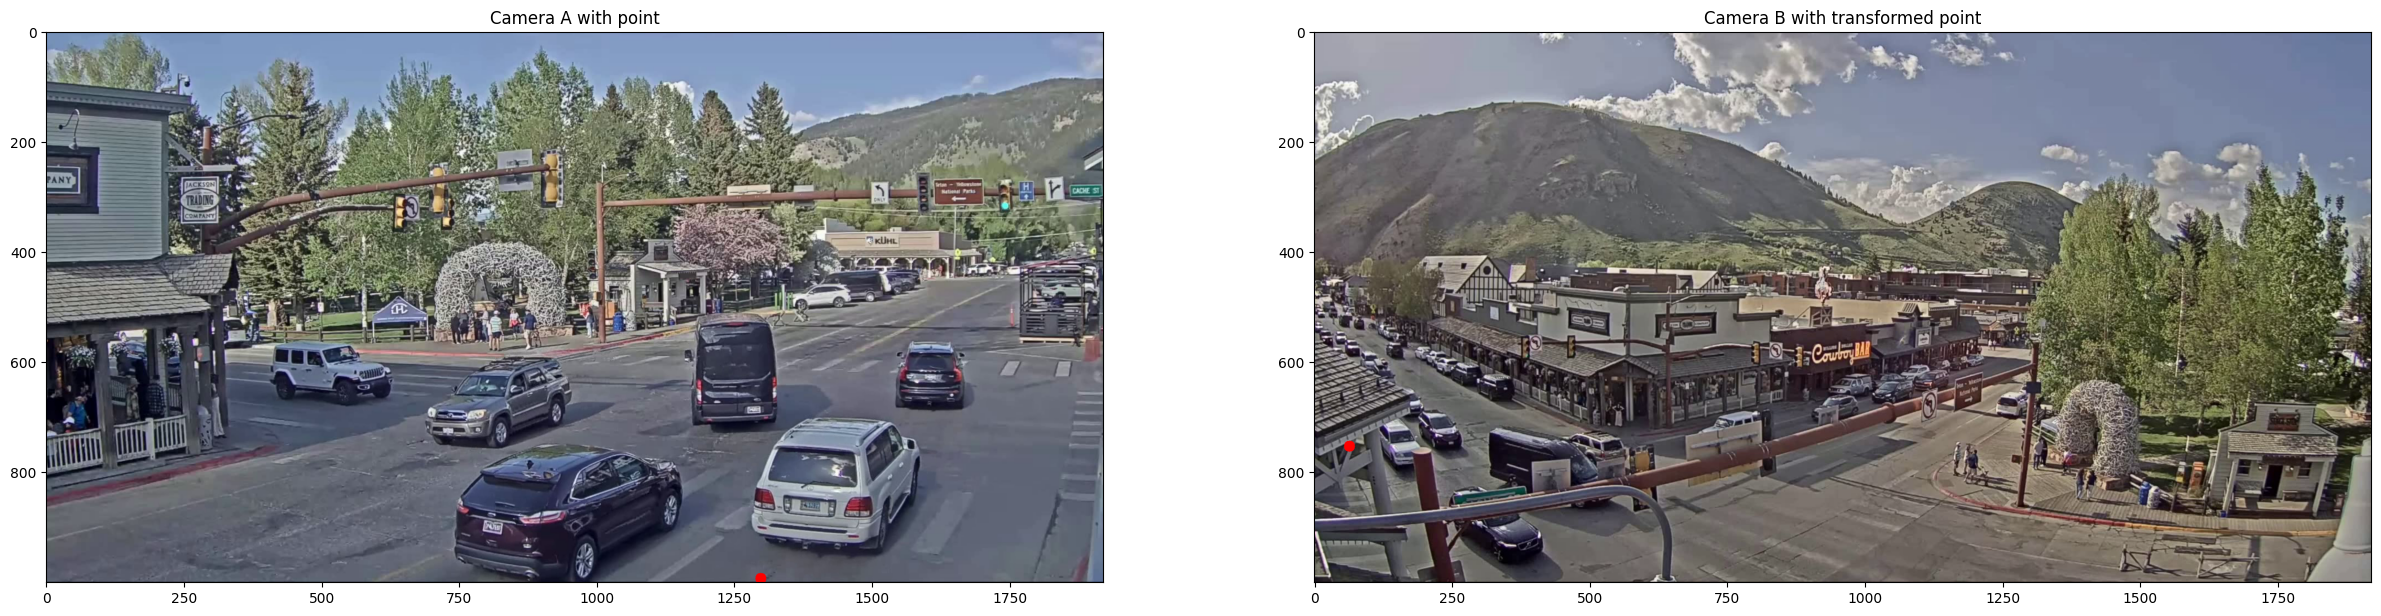

In [11]:
# Transform the points from camera A to camera B

points_to_transform = np.array([
    [1298, 993],
])
transformed_points = cv.perspectiveTransform(points_to_transform.reshape(-1, 1, 2).astype(np.float32), F)[0].astype(int)
print(transformed_points)

a_copy = a.copy()
b_copy = b.copy()

cv.circle(a_copy, points_to_transform[0], 10, (255, 0, 0), -1)

# Draw the transformed points on the warped image
for i in range(len(transformed_points)):
    cv.circle(b_copy, transformed_points[i], 10, (255, 0, 0), -1)

fig, ax = plt.subplots(1, 2, figsize=(30, 40))
ax[0].imshow(a_copy)
ax[0].set_title("Camera A with point")
ax[1].imshow(b_copy)
ax[1].set_title("Camera B with transformed point")
plt.show()

In [12]:
np.save("homography_matrices/AB.npy", F)
np.save("homography_matrices/BA.npy", Finv)